<a href="https://colab.research.google.com/github/deepu718/tensorflow_practice/blob/main/01_Example_Insurance_Forecast_by_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Let's try one_hot encode our dataframe
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop('charges',axis=1)
y = insurance_one_hot['charges']

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
# Build a neural network

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])

# 3. fit the model
model.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
# Check the results of the insurance model on the test data
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7543.7158 - mse: 105482208.0000


[7543.7158203125, 105482208.0]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well.. let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
  1. Add an extra layer with more hidden units and use the adam optimizers.
  2. Train for longer.
  3. combination of above

In [ ]:
# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. fit the model
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 2ms/step - loss: 13247.0811 - mae: 13247.0811
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13025.2080 - mae: 13025.2080
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12594.6328 - mae: 12594.6328
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11789.1895 - mae: 11789.1895
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10531.4238 - mae: 10531.4238
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9088.2451 - mae: 9088.2451
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7916.2139 - mae: 7916.2139
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7479.3823 - mae: 7479.3823
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7422.6685 - mae: 7422.6685
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7404.7856 - mae:

In [ ]:
model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4739.8975 - mae: 4739.8975


[4739.8974609375, 4739.8974609375]

In [ ]:
# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
model_3.fit(X_train,y_train,epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 2ms/step - loss: 8782.9482 - mae: 8782.9482
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 7564.4453 - mae: 7564.4453
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 7736.1494 - mae: 7736.1494
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 7729.7017 - mae: 7729.7017
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 7781.7197 - mae: 7781.7197
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 7701.5825 - mae: 7701.5825
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 7462.9482 - mae: 7462.9482
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 7771.9185 - mae: 7771.9185
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 7807.1318 - mae: 7807.1318
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 7895.8130 - mae: 7895.8130

In [ ]:
model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7198.5127 - mae: 7198.5127


[7198.5126953125, 7198.5126953125]

In [ ]:
# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. fit the model
history = model_4.fit(X_train,y_train,epochs=300,verbose=0)

In [ ]:
model_4.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3205.5654 - mae: 3205.5654


[3205.5654296875, 3205.5654296875]

Text(0.5, 0, 'epochs')

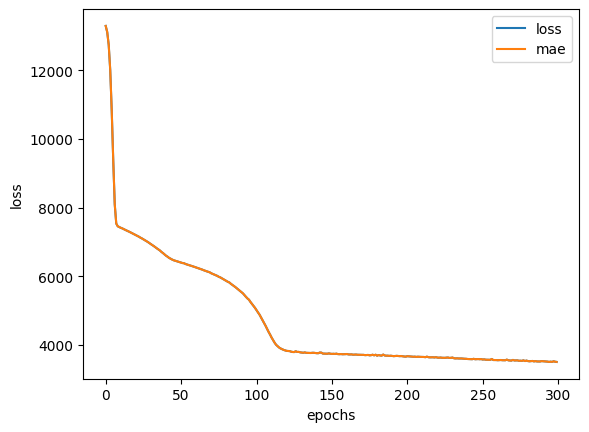

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing data (normalization and standardization)

In terms of scaling values neural networks tends to prefer normalization

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data, we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # turn all value in these column normalised
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create X & y

X = insurance.drop("charges",axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [ ]:
# 1. Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. fit the model
history = model_5.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13343.4922 - mae: 13343.4922
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13334.4209 - mae: 13334.4209
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13312.5234 - mae: 13312.5234
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13266.6250 - mae: 13266.6250
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13185.5176 - mae: 13185.5176
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 13058.2100 - mae: 13058.2100
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 12874.5996 - mae: 12874.5996
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12624.4951 - mae: 12624.4951
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12298.7275 - mae: 12298.7275
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11891.07

In [ ]:
model_5.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3443.2129 - mae: 3443.2129


[3443.212890625, 3443.212890625]

In [ ]:
# model_2 evaluation model_5 is faster
#9/9 [==============================] - 0s 2ms/step - loss: 4739.8975 - mae: 4739.8975
#[4739.8974609375, 4739.8974609375]

Text(0.5, 0, 'epochs')

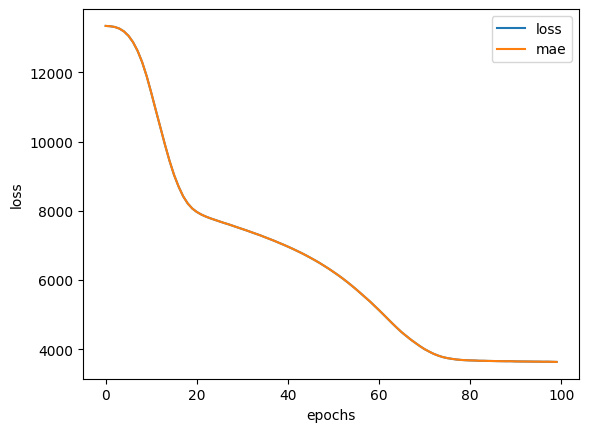

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")